## Import library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', palette='Paired')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

# **Regresi**

## Import Dataset

In [2]:
# path dataset
path = '/content/R03_excercises.csv'

# membaca dataset
df_reg = pd.read_csv(path)
df_reg.head()

,Daily Exercise Time (X),Weight Loss (Y)
0,0.5,0.2
1,1.0,0.4
2,1.5,0.7
3,2.0,1.0
4,1.0,0.3


## Data Understanding

In [3]:
# cek jumlah data
df_reg.shape

(74, 2)

In [4]:
# cek info data
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Daily Exercise Time (X)  74 non-null     float64
 1   Weight Loss (Y)          74 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [5]:
# deskriptive statistics
df_reg.describe()

,Daily Exercise Time (X),Weight Loss (Y)
count,74.000000,74.000000
mean,2.124324,1.001351
std,1.021121,0.567980
min,0.400000,0.200000
25%,1.225000,0.500000
50%,2.050000,1.000000
75%,2.975000,1.500000
max,3.900000,2.000000


## Data Preprocessing

In [6]:
# cek nilai null
df_reg.isnull().sum()

,0
Daily Exercise Time (X),0
Weight Loss (Y),0


dari informasi diatas dapat dipastikan data tidak memiliki null value

In [7]:
# cek nilai duplikat
df_reg.duplicated().sum()

30

karena total data hanya 70 dan kalo misal saya hapus nilai duplikat nya tkut kehilangan informasi maka saya abaikan saja step ini

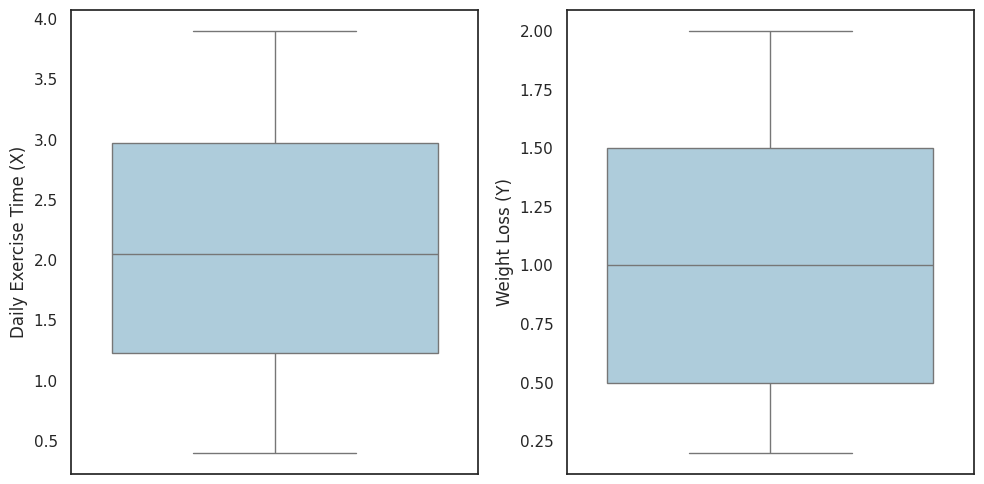

In [8]:
# cek outlier menggunakan boxplot
plt.figure(figsize=(10, 5))
for i in range(0, len(df_reg.columns)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df_reg.iloc[:, i])
plt.tight_layout()

dari visualisasi boxplot diatas dapat dilihat bahwa kedua fitur tidak memiliki outlier

## Data Modelling

In [9]:
# splitting
X = df_reg['Daily Exercise Time (X)']
y = df_reg['Weight Loss (Y)']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# inisialisasi decision tree regressor
dt_reg = DecisionTreeRegressor()

# params untuk gridsearch
params = {
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# obj gridsearchcv
grid = GridSearchCV(estimator=dt_reg, param_grid=params, cv=3, n_jobs=-1, verbose=1, error_score='raise')

# melatih gridsearch
grid.fit(X_train.values.reshape(-1, 1), y_train)

# menampilkan best parameters
print('Best Hyperparameters:', grid.best_params_)
# menyimpan hasil grid ke var dt_reg
dt_reg = grid.best_estimator_

Fitting 3 folds for each of 160 candidates, totalling 480 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [11]:
# latih data dengan best parameter
dt_reg.fit(X_train.values.reshape(-1, 1), y_train)

# prediksi
y_pred = dt_reg.predict(X_test.values.reshape(-1, 1))

## Model Evaluation

In [12]:
# cek metric regresi
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 0.039999999999999994
MSE: 0.0053333333333333306
RMSE: 0.07302967433402213
R2 Score: 0.9839657936932122


Berdasarkan evaluasi model regresi, terlihat bahwa model Decision Tree mampu memprediksi penurunan berat badan (Weight Loss) dengan cukup baik, ditunjukkan oleh nilai R2 yang mendekati 1 dan nilai RMSE yang relatif rendah. Hal ini mengindikasikan bahwa waktu latihan harian (Daily Exercise Time) memiliki korelasi yang kuat dengan penurunan berat badan, dan model dapat menangkap hubungan tersebut dengan akurasi yang lumayan.

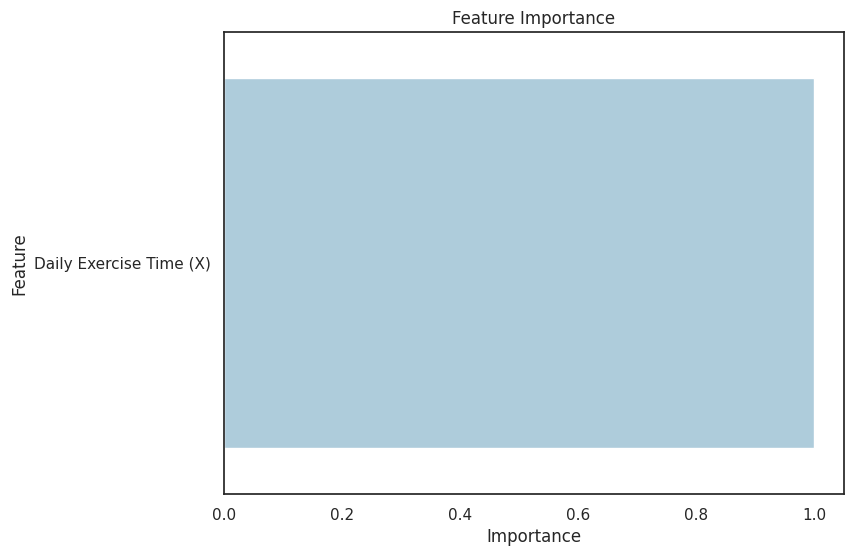

skor feature importance:
                   Feature  Importance
0  Daily Exercise Time (X)         1.0


In [13]:
# feature importance
feature_importance = dt_reg.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': ['Daily Exercise Time (X)'], 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# hasil feature importance
print(f'skor feature importance:\n{feature_importance_df}')

Berdasarkan hasil analisis *feature importance*, dapat disimpulkan bahwa fitur "Daily Exercise Time (X)" memiliki pengaruh yang paling signifikan terhadap penurunan berat badan (Weight Loss). Skor *feature importance* yang tinggi menunjukkan bahwa model Decision Tree yang telah dibangun menganggap fitur ini sebagai faktor utama dalam memprediksi penurunan berat badan. Hal ini sejalan dengan intuisi umum bahwa durasi latihan harian memiliki korelasi kuat dengan tingkat penurunan berat badan. Dengan demikian, dapat dikatakan bahwa model ini berhasil mengidentifikasi variabel yang paling penting dalam memprediksi penurunan berat badan, dan  menekankan pentingnya waktu latihan harian dalam mencapai penurunan berat badan yang diinginkan.

# **Klasifikasi**

## Import Dataset

In [14]:
# path dataset
path = '/content/K02_diabetes.csv'

# membaca dataset
df_clasif = pd.read_csv(path)
df_clasif.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Data Understanding

In [15]:
# cek jumlah data
df_clasif.shape

(100000, 9)

In [16]:
# info data
df_clasif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [17]:
# memisahkan data dari tipe data nya
num_cols = df_clasif.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_clasif.select_dtypes(include=['object']).columns

print(f'Jumlah kolom numerik: {len(num_cols)}')
print(f'Jumlah kolom kategorikal: {len(cat_cols)}')

Jumlah kolom numerik: 7
Jumlah kolom kategorikal: 2


In [18]:
# deksriptif statistic kategorikal
df_clasif[cat_cols].describe()

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [19]:
# deksriptif statistic numerical
df_clasif[num_cols].describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [20]:
# cek total nilai unik pada kategorikal
for col in cat_cols:
    print(f'{col}: {df_clasif[col].nunique()}')

gender: 3
smoking_history: 6


karena pada fitur gender ada 3 unik mari kita cek ada apa saja

In [21]:
# cek nilai unik pada fitur gender
df_clasif['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [22]:
# cek total nilai pada fitur gender
df_clasif['gender'].value_counts()

,count
gender,
Female,58552
Male,41430
Other,18


kita ubah nilai other pada fitur gender ke class yg paling minimal nilainya yaitu Male

In [23]:
# replace other dengan male
df_clasif['gender'] = df_clasif['gender'].replace('Other', 'Male')

In [24]:
# cek nilai unik kembali
df_clasif['gender'].unique()

array(['Female', 'Male'], dtype=object)

sekarang nilai gender sudah benar yakni ada dua saja

In [25]:
# cek nilai unik pada fitur smoking history
df_clasif['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

karena nilai unik pada fitur smoking history tidak ordinal maka akan kita gunakan one hot encoder untuk encoding nnti

In [26]:
# cek total nilai pada fitur smoking history
df_clasif['smoking_history'].value_counts()

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


## Data Preprocessing

In [27]:
# cek nilai null
df_clasif.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


tidak ada nilai null pada data, mari lanjut ke cek duplikasi

In [28]:
# cek nilai duplikat
df_clasif.duplicated().sum()

3857

ada nilai duplikat sebesar 3857, mari kita hapus duplikat tersebut

In [29]:
# hapus nilai duplikat
print(f'Jumlah data sebelum dihapus duplikat: {df_clasif.shape[0]}')
df_clasif.drop_duplicates(inplace=True)
print(f'Jumlah data setelah dihapus duplikat: {df_clasif.shape[0]}')

Jumlah data sebelum dihapus duplikat: 100000
Jumlah data setelah dihapus duplikat: 96143


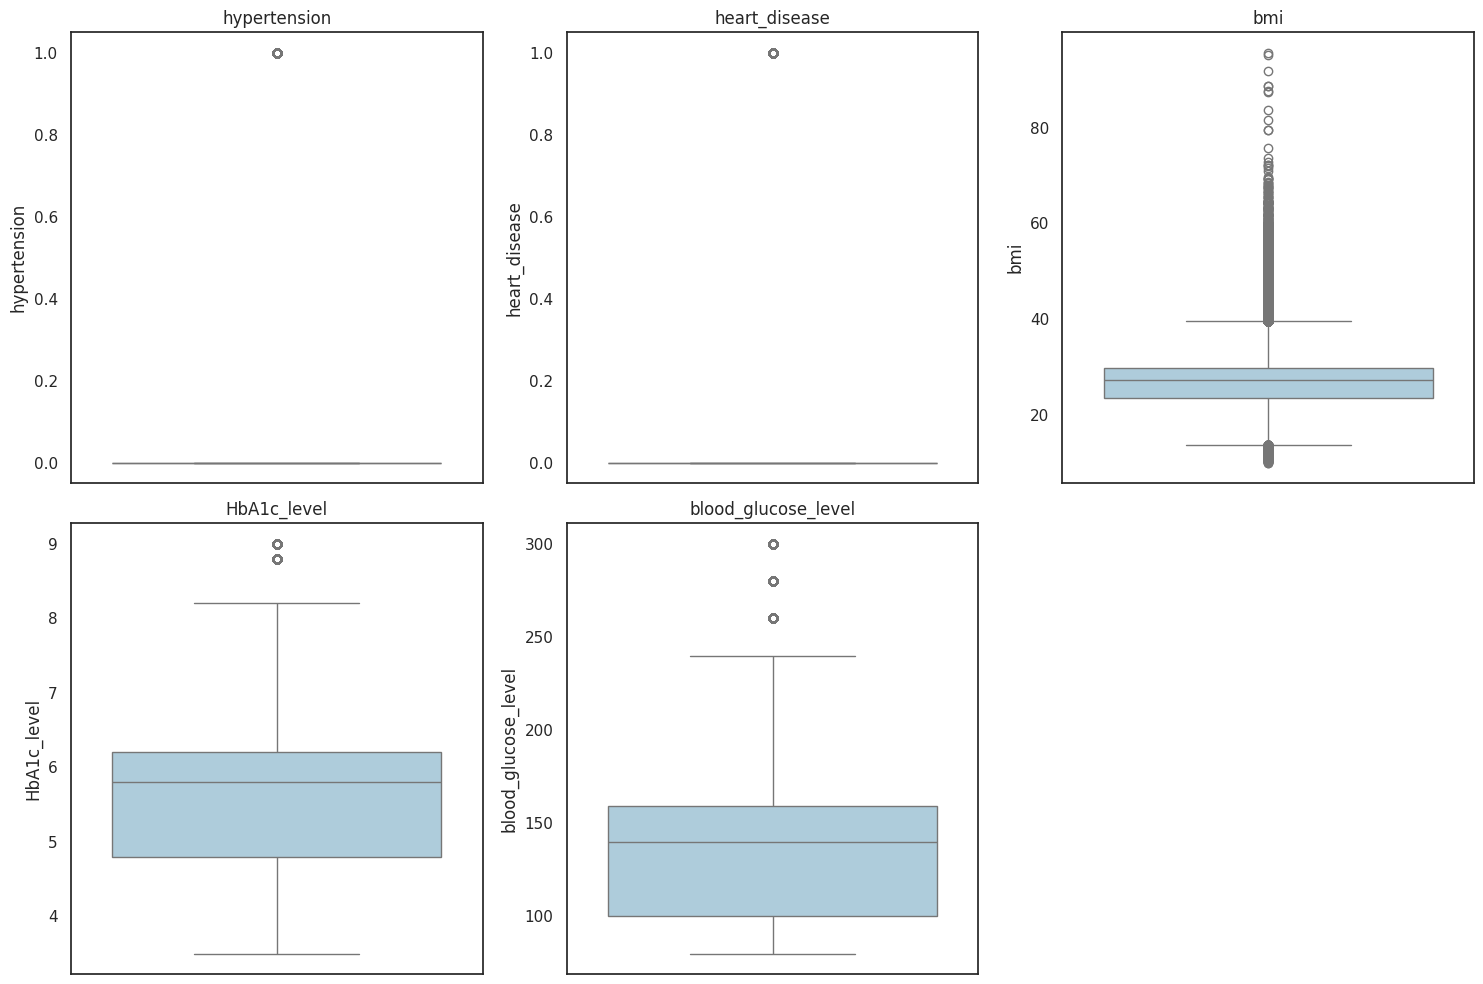

In [30]:
# cek outlier menggunakan boxplot

col_to_check = ['hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

plt.figure(figsize=(15, 10))
for i in range(0, len(col_to_check)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df_clasif[col_to_check[i]])
    plt.title(col_to_check[i])
plt.tight_layout()

Berdasarkan visualisasi boxplot yang ditampilkan, beberapa fitur menunjukkan adanya outlier. Outlier ditandai dengan titik-titik data yang berada di luar batas *whisker* pada boxplot.

**Fitur-fitur yang menunjukkan potensi outlier adalah:**

* **bmi:** Terdapat beberapa data yang berada di luar *whisker* bagian atas, mengindikasikan adanya nilai BMI yang tinggi secara tidak lazim.
* **HbA1c_level:**  Ada outlier yang terlihat pada bagian atas *whisker*, menunjukkan adanya beberapa individu dengan tingkat HbA1c yang lebih tinggi dari biasanya.
* **blood_glucose_level:** Sama seperti HbA1c_level, ada outlier pada bagian atas *whisker* yang menandakan beberapa individu memiliki kadar glukosa darah yang lebih tinggi dibandingkan mayoritas data.

**Fitur-fitur yang tidak terlihat memiliki outlier:**

* **hypertension:**  Sebagian besar data terpusat pada nilai 0, dengan sedikit data pada nilai 1.
* **heart_disease:** Mirip dengan *hypertension*,  data terpusat pada nilai 0, dengan beberapa data pada nilai 1.

In [31]:
# hapus outlier pada fitur yg menunjukkan potensi outlier menggunakan iqr
col_to_check = ['bmi', 'HbA1c_level', 'blood_glucose_level']

# fungsi hapus outlier
def remove_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# hapus outlier pada data
for col in col_to_check:
    df_clasif = remove_outlier(df_clasif, col)

In [32]:
# cek total data setelah penghapusan outlier
df_clasif.shape[0]

88192

dari data yg sudah saya hapus pada saat drop duplicated adalah 96143
dan setelah hapus outlier menjadi 88192

## Feature Engineering

In [33]:
# label encoder untuk fitur gender
le = LabelEncoder()
df_clasif['gender'] = le.fit_transform(df_clasif['gender'])
df_clasif.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [34]:
# cek class le
le.classes_

array(['Female', 'Male'], dtype=object)

nilai 0 menunjukkan female sedangkan nilai 1 menunjukkan male

In [35]:
# one hot encoder untuk fitur smoking_history
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

df_clasif_ohe = pd.DataFrame(ohe.fit_transform(df_clasif[['smoking_history']]), columns=ohe.get_feature_names_out(['smoking_history']))
df_clasif = pd.concat([df_clasif, df_clasif_ohe], axis=1)
df_clasif.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0,1.0,0.0,0.0,0.0,0.0


In [36]:
# hapus fitur smoking history karena sudah tidak dibutuhkan
df_clasif.drop('smoking_history', axis=1, inplace=True)
df_clasif.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,80.0,0.0,1.0,25.19,6.6,140.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,54.0,0.0,0.0,27.32,6.6,80.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,28.0,0.0,0.0,27.32,5.7,158.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,36.0,0.0,0.0,23.45,5.0,155.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,76.0,1.0,1.0,20.14,4.8,155.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
# cek nilai null setelah dilakukan encoding
df_clasif.isnull().sum()

,0
gender,10087
age,10087
hypertension,10087
heart_disease,10087
bmi,10087
HbA1c_level,10087
blood_glucose_level,10087
diabetes,10087
smoking_history_current,10087
smoking_history_ever,10087


In [38]:
# hapus nilai null dgn dropna
df_clasif.dropna(inplace=True)

In [39]:
# cek info data lagi stelah feature engineering dan drop null value
df_clasif.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78105 entries, 0 to 88191
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       78105 non-null  float64
 1   age                          78105 non-null  float64
 2   hypertension                 78105 non-null  float64
 3   heart_disease                78105 non-null  float64
 4   bmi                          78105 non-null  float64
 5   HbA1c_level                  78105 non-null  float64
 6   blood_glucose_level          78105 non-null  float64
 7   diabetes                     78105 non-null  float64
 8   smoking_history_current      78105 non-null  float64
 9   smoking_history_ever         78105 non-null  float64
 10  smoking_history_former       78105 non-null  float64
 11  smoking_history_never        78105 non-null  float64
 12  smoking_history_not current  78105 non-null  float64
dtypes: float64(13)
memory

karena data sudah bertipe numeric semua maka bisa lanjut ke modelling dengan total akhir data sebsar 78105

## Data Modelling

In [40]:
# data splitting
X = df_clasif.drop('diabetes', axis=1)
y = df_clasif['diabetes']

In [41]:
# cek balance data pada target fitur
y.value_counts()

,count
diabetes,
0.0,74052
1.0,4053


karena class 0 dan 1 tidak seimbang maka saya akan gunakan SMOTEENN untuk menghandle nya, metode ini menggabungkan kemampuan SMOTE untuk menghasilkan contoh sintetik untuk kelas minoritas dan kemampuan ENN untuk menghapus beberapa observasi dari kedua kelas yang diidentifikasi memiliki kelas yang berbeda antar kelas observasi.

In [42]:
# inisialisasi smoteenn
smoteenn = SMOTEENN(random_state=42)

# fit_resample
X_res, y_res = smoteenn.fit_resample(X, y)

In [44]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [45]:
# inisialisasi decision tree classifier
dt_clasif = DecisionTreeClassifier()

# params untuk gridsearch
params = {
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# obj gridsearchcv
grid = GridSearchCV(estimator=dt_clasif, param_grid=params, cv=3, n_jobs=-1, verbose=1)

# melatih gridsearch
grid.fit(X_train, y_train)

# menampilkan best parameters
print('Best Hyperparameters:', grid.best_params_)
# menyimpan hasil grid ke var dt_clasif
dt_clasif = grid.best_estimator_

Fitting 3 folds for each of 160 candidates, totalling 480 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 6, 'random_state': 42}


In [46]:
# latih data dengan best parameter
dt_clasif.fit(X_train, y_train)

# prediksi
y_pred = dt_clasif.predict(X_test)

## Metric Evaluation

In [47]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     12830
         1.0       0.98      0.98      0.98     14419

    accuracy                           0.98     27249
   macro avg       0.98      0.98      0.98     27249
weighted avg       0.98      0.98      0.98     27249



Berdasarkan classification report, model Decision Tree Classifier yang dibangun menunjukkan performa yang cukup baik dalam memprediksi diabetes. Model memiliki akurasi secara keseluruhan yang baik, dengan presisi, recall, dan f1-score yang lumayan untuk kedua kelas (diabetes dan non-diabetes).

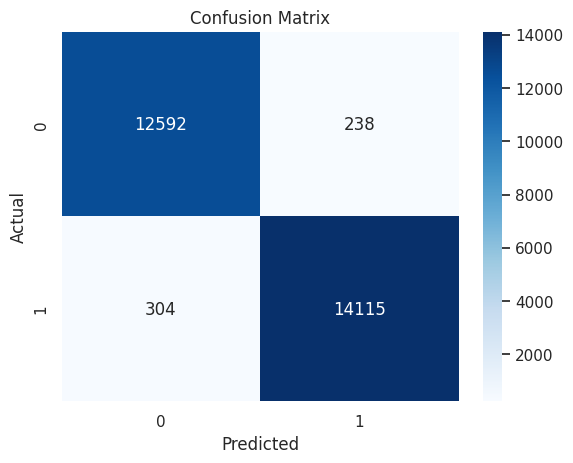

In [48]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Berdasarkan confusion matrix yang dihasilkan, model klasifikasi Decision Tree memiliki performa yang cukup baik dalam memprediksi diabetes. Terlihat bahwa model mampu mengklasifikasikan dengan benar sebagian besar kasus diabetes dan non-diabetes. Namun, terdapat beberapa kasus yang salah diklasifikasikan, baik yang seharusnya positif namun diprediksi negatif (false negative) maupun yang seharusnya negatif namun diprediksi positif (false positive).

tetapi secara keseluruhan model dapat mengklasifikasikan secara baik

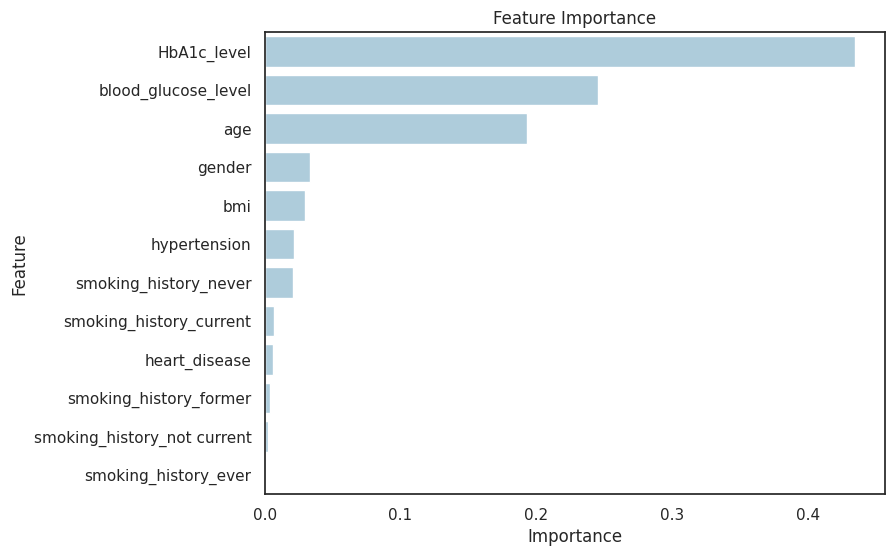

In [49]:
# feature importance
fi_clasif = dt_clasif.feature_importances_
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': fi_clasif})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Berdasarkan analisis *feature importance* pada model klasifikasi Decision Tree, beberapa fitur terbukti memiliki pengaruh signifikan dalam memprediksi diabetes. Fitur 'HbA1c_level'menempati posisi teratas dalam hal *importance*, menunjukkan bahwa tingkat kegemukan individu merupakan faktor utama yang dipertimbangkan model dalam memprediksi kemungkinan terkena diabetes.
Selain itu, fitur 'blood_glucose_level' (kadar glukosa darah) dan 'bmi' juga memiliki *importance* yang tinggi, menandakan peran penting kadar glukosa dalam darah dalam prediksi diabetes. Fitur 'age' (umur) juga berpengaruh, menunjukkan bahwa usia merupakan faktor yang perlu diperhatikan dalam memprediksi risiko diabetes. Terakhir, fitur 'hypertension' dan 'smoking_history' (riwayat merokok) juga memiliki kontribusi, meskipun relatif lebih kecil dibandingkan fitur-fitur sebelumnya.

Dengan demikian, dapat disimpulkan bahwa model telah berhasil mengidentifikasi variabel-variabel yang paling berpengaruh dalam memprediksi diabetes,  di mana faktor-faktor seperti BMI, kadar glukosa, dan HbA1c menjadi penentu utama dalam prediksi tersebut.